<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/11장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

# 11장 알고리즘 복잡도에 대한 간략한 소개

## 11.1 계산 복잡도에 관한 고찰

In [1]:
def f(i): 
    """i는 int이고 i >= 0라고 가정합니다""" 
    answer = 1 
    while i >= 1: 
        answer *= i 
        i -= 1 
    return answer 

In [2]:
def linear_search(L, x): 
    for e in L: 
        if e == x: 
            return True 
    return False 

In [3]:
def fact(n): 
    """n은 양의 정수라고 가정합니다.
       n!을 반환합니다""" 
    answer = 1 
    while n > 1:
        answer *= n
        n -= 1 
    return answer

그림 11-1 완전 열거를 사용해 제곱근의 근삿값 찾기

In [4]:
def square_root_exhaustive(x, epsilon): 
    """x와 epsilon은 양의 실수이고 epsilon < 1이라고 가정합니다. 
       x에서 epsilon 이내에 y*y가 있을 때 y를 반환합니다""" 
    step = epsilon**2 
    ans = 0.0 
    while abs(ans**2 - x) >= epsilon and ans*ans <= x: 
        ans += step 
    if ans*ans > x: 
        raise ValueError 
    return ans 

그림 11-2 이분 검색을 사용해 제곱근의 근삿값 찾기

In [5]:
def square_root_bi(x, epsilon): 
    """x와 epsilon은 양의 실수이고 epsilon < 1이라고 가정합니다. 
       x에서 epsilon 이내에 y*y가 있을 때 y를 반환합니다"""  
    low = 0.0 
    high = max(1.0, x) 
    ans = (high + low)/2.0 
    while abs(ans**2 - x) >= epsilon: 
        if ans**2 < x: 
            low = ans 
        else: 
            high = ans 
        ans = (high + low)/2.0 
    return ans 

## 11.2 점근 표기법

그림 11-3 점근 복잡도

In [6]:
def f(x): 
    """x는 0보다 큰 정수라고 가정합니다""" 
    ans = 0 
    #상수 시간이 걸리는 루프
    for i in range(1000): 
        ans += 1 
    print('지금까지 덧셈 횟수:', ans) 
    #x 시간이 걸리는 루프
    for i in range(x): 
        ans += 1 
    print('지금까지 덧셈 횟수:', ans) 
    #x**2 시간이 걸리는 중첩 루프
    for i in range(x): 
        for j in range(x): 
            ans += 1 
            ans += 1 

    print('지금까지 덧셈 횟수:', ans) 
    return ans 

In [7]:
f(10)

지금까지 덧셈 횟수: 1000
지금까지 덧셈 횟수: 1010
지금까지 덧셈 횟수: 1210


1210

In [8]:
f(1000)

지금까지 덧셈 횟수: 1000
지금까지 덧셈 횟수: 2000
지금까지 덧셈 횟수: 2002000


2002000

**손가락 운동**

In [9]:
def g(L, e): 
    """L은 정수 리스트이고 e는 정수입니다""" 
    for i in range(100): 
        for e1 in L: 
            if e1 == e: 
                return True 
    return False 

def h(L, e): 
    """L은 정수 리스트이고 e는 정수입니다""" 
    for i in range(e): 
        for e1 in L: 
            if e1 == e: 
                return True 
    return False

g(L,e)의 복잡도는 O(100n), h(L,e)의 복잡도는 O(e*n). n은 L의 길이입니다.

## 11.3 중요한 몇 가지 복잡도 종류

### 11.3.1 상수 복잡도

### 11.3.2 로그 복잡도

In [10]:
def int_to_str(i): 
    """i는 0보다 큰 정수라고 가정합니다.
       i의 문자열 표현을 반환합니다""" 
    digits = '0123456789' 
    if i == 0: 
        return '0' 
    result = '' 
    while i > 0: 
        result = digits[i%10] + result 
        i = i//10 
    return result 

In [11]:
def add_digits(n): 
    """n이 0보다 큰 정수라고 가정합니다. 
       n에 있는 숫자의 합을 반환합니다""" 
    string_rep = int_to_str(n) 
    val = 0 
    for c in string_rep: 
        val += int(c) 
    return val 

### 11.3.3 선형 복잡도

In [12]:
def add_digits(s): 
    """s는 숫자 문자열이라고 가정합니다.
       s에 있는 숫자의 합을 반환합니다""" 
    val = 0 
    for c in string_rep: 
        val += int(c) 
    return val 

In [13]:
def factorial(x): 
    """x는 양의 정수라고 가정합니다. 
       x!를 반환합니다""" 
    if x == 1: 
        return 1 
    else: 
        return x*factorial(x-1) 

### 11.3.4 로그 선형 복잡도

### 11.3.5 다항 복잡도

그림 11-4 부분집합 테스트 함수

In [14]:
def is_subset(L1, L2): 
    """L1과 L2는 리스트로 가정합니다. 
       L1의 모든 원소가 L2에도 있으면 True, 그렇지 않으면 False를 반환합니다""" 
    for e1 in L1: 
        matched = False 
        for e2 in L2: 
            if e1 == e2: 
                matched = True 
                break 
        if not matched: 
            return False 
    return True 

그림 11-5 두 리스트의 교집합 구하기

In [15]:
def intersect(L1, L2): 
    """가정: L1와 L2는 리스트입니다.
       L1과 L2의 교집합을 반환합니다""" 
    #공통 원소를 담은 리스트를 만듭니다
    tmp = [] 
    for e1 in L1: 
        for e2 in L2: 
            if e1 == e2: 
                tmp.append(e1) 
                break 
    #중복이 없는 리스트 만들기
    result = [] 
    for e in tmp: 
        if e not in result: 
            result.append(e) 
    return result

### 11.3.6 지수 복잡도

In [16]:
def get_binary_rep(n, num_digits): 
    """n과 num_digits은 음수가 아닌 정수로 가정합니다. 
       n의 이진 표현을 num_digits 길이의 문자열로 반환합니다""" 
    result = '' 
    while n > 0: 
        result = str(n%2) + result 
        n = n//2 
    if len(result) > num_digits: 
        raise ValueError('num_digits가 부족합니다') 
    for i in range(num_digits - len(result)): 
        result = '0' + result 
    return result 

def gen_powerset(L): 
    """L은 리스트로 가정합니다. 
       L에 있는 원소로 가능한 모든 조합을 담은 리스트의 리스트를 반환합니다.
       예를 들어 L이 [1, 2]이면 [], [1], [2], [1, 2]를 원소로 가진 리스트를 반환합니다""" 
    powerset = [] 
    for i in range(0, 2**len(L)): 
        bin_str = get_binary_rep(i, len(L)) 
        subset = [] 
        for j in range(len(L)): 
            if bin_str[j] == '1': 
                subset.append(L[j]) 
        powerset.append(subset) 
    return powerset 

### 11.3.7 복잡도 비교

그림 11-7 상수, 로그, 선형 복잡도

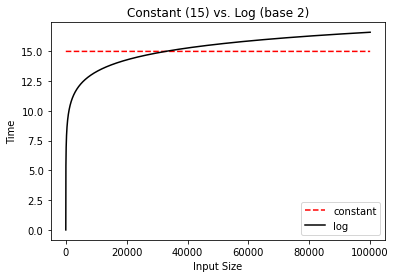

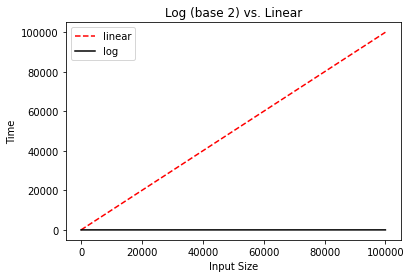

In [17]:
import matplotlib.pyplot as plt
import math

x_vals = range(1, 100000, 1)
y_const, y_log = [], []
for x in x_vals:
    y_const.append(15)
    y_log.append(math.log2(x))
plt.plot(x_vals, y_const, 'r--', label = 'constant')
plt.plot(x_vals, y_log, 'k-', label = 'log')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.title('Constant (15) vs. Log (base 2)')
plt.legend()

plt.figure()
x_vals = range(1, 100000, 1)
y_log, y_linear = [], []
for x in x_vals:
    y_linear.append(x)
    y_log.append(math.log2(x))
plt.plot(x_vals, y_linear, 'r--', label = 'linear')
plt.plot(x_vals, y_log, 'k-', label = 'log')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.title('Log (base 2) vs. Linear')
plt.legend()
plt.show()

그림 11-8 선형, 로그-선형, 다항 복잡도

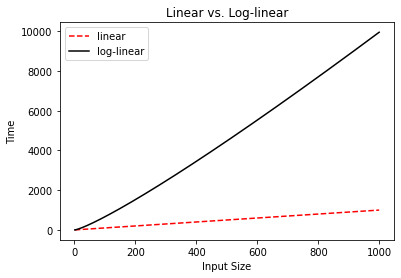

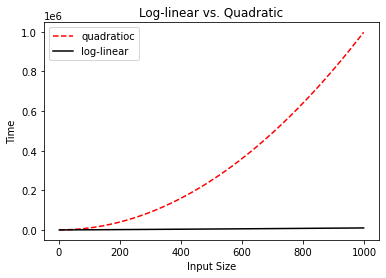

In [18]:
plt.figure()
x_vals = range(1, 1000, 1)
y_log_linear, y_linear = [], []
for x in x_vals:
    y_linear.append(x)
    y_log_linear.append(x*math.log2(x))
plt.plot(x_vals, y_linear, 'r--', label = 'linear')
plt.plot(x_vals, y_log_linear, 'k-', label = 'log-linear')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.title('Linear vs. Log-linear')
plt.legend()

plt.figure()
x_vals = range(1, 1000, 1)
y_log_linear, y_quadratic = [], []
for x in x_vals:
    y_quadratic.append(x**2)
    y_log_linear.append(x*math.log2(x))
plt.plot(x_vals, y_quadratic, 'r--', label = 'quadratioc')
plt.plot(x_vals, y_log_linear, 'k-', label = 'log-linear')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.title('Log-linear vs. Quadratic')
plt.legend()
plt.show()

그림 11-9 2차 다항식과 지수 복잡도

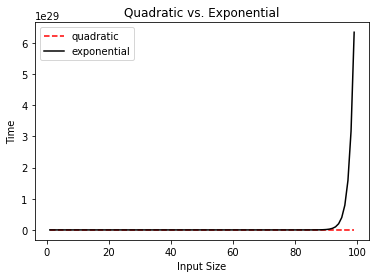

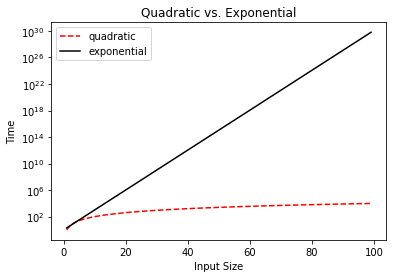

In [19]:
plt.figure()
x_vals = range(1, 100, 1)
y_quad, y_exp = [], []
for x in x_vals:
    y_quad.append(x**2)
    y_exp.append(2**x)
plt.plot(x_vals, y_quad, 'r--', label = 'quadratic')
plt.plot(x_vals, y_exp, 'k-', label = 'exponential')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.title('Quadratic vs. Exponential')
plt.legend()

plt.figure()
x_vals = range(1, 100, 1)
y_quad, y_exp = [], []
for x in x_vals:
    y_quad.append(x**2)
    y_exp.append(2**x)
plt.plot(x_vals, y_quad, 'r--', label = 'quadratic')
plt.plot(x_vals, y_exp, 'k-', label = 'exponential')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.title('Quadratic vs. Exponential')
plt.legend()
plt.semilogy()
plt.show()